In [22]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import numpy as np

dataset = data = pd.read_csv("start_data_small.csv")
columns = dataset.columns

In [17]:
#@title Basisinformatie dataset
#@markdown Zoals hieronder te zien is zijn er geen null 
#@markdown waarden aanwezig in de dataset. 
#@markdown - SalesDate is een datum
#@markdown - SalesQuantity is een int, die de hoeveelheid
#@markdown verkochte goederen voorstelt.
#@markdown - Overige zijn nominale waarden die verwijzen
#@markdown naar een id die de winkel of het product
#@markdown beschrijft.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163328 entries, 0 to 163327
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   StoreCode            163328 non-null  int64 
 1   StoreCategoryCode    163328 non-null  int64 
 2   ProductId            163328 non-null  int64 
 3   ProductCategoryCode  163328 non-null  int64 
 4   SalesQuantity        163328 non-null  int64 
 5   SalesDate            163328 non-null  object
dtypes: int64(5), object(1)
memory usage: 7.5+ MB


In [18]:
#@title Beschrijving van de dataset
#@markdown Bij salesquantity valt duidelijk te zien dat de
#@markdown maximum en minimumwaarden uitschieters
#@markdown zijn, deze zullen we dus verwijderen
#@markdown alvorens de dataset te gebruiken om te
#@markdown trainen. We merken ook dat 75% van de
#@markdown datapunten minder dan 5 hebben als
#@markdown Salesquantity.
#@markdown De overige velden zijn nominale datapunten,
#@markdown wat betekent dat er geen nuttige conclusies
#@markdown uit deze beschrijving kunnen worden
#@markdown gemaakt.
dataset.describe()

,StoreCode,StoreCategoryCode,ProductId,ProductCategoryCode,SalesQuantity
count,163328.000000,163328.000000,163328.000000,163328.000000,163328.000000
mean,580.175696,1.108028,5564.370684,420.370849,4.205978
std,260.585765,0.310417,3006.677181,161.577364,23.501194
min,131.000000,1.000000,44.000000,203.000000,-44.000000
25%,410.000000,1.000000,4161.000000,270.000000,2.000000
50%,673.000000,1.000000,4859.000000,518.000000,3.000000
75%,825.000000,1.000000,8654.000000,518.000000,5.000000
max,951.000000,2.000000,9066.000000,723.000000,7700.000000


### Sales per productId

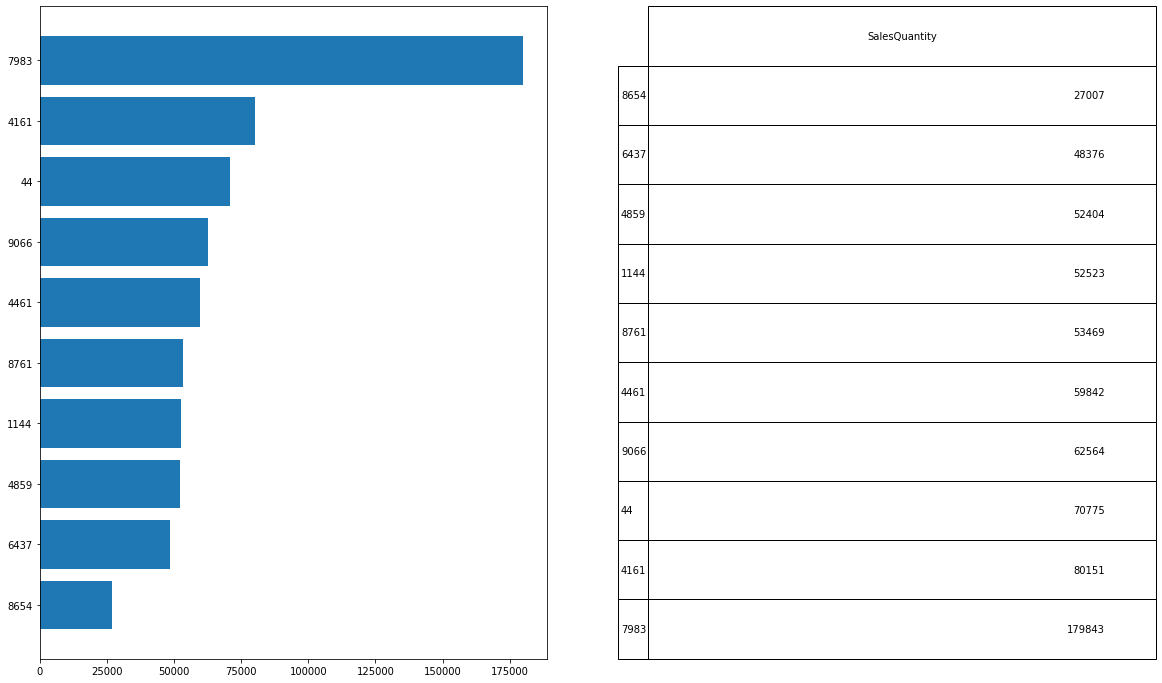

In [23]:
#@title Salesquantity per productID
#@markdown In onderstaande grafiek en tabel valt te zien
#@markdown dat productID 7983 de meeste sales heeft.
#@markdown Dit is meer dan het dubbele van de tweede
#@markdown plaats.
product_ids = dataset["ProductId"].unique()
product_sales_dict = {}
for id in product_ids:
    product_sales_dict[id] = sum(dataset.loc[dataset["ProductId"]==id,"SalesQuantity"])
product_sales = pd.DataFrame.from_dict(product_sales_dict, orient="index")
product_sales.columns = ["SalesQuantity"]
product_sales = product_sales.sort_values(by="SalesQuantity").reset_index()
product_sales.columns = ["ProductId","SalesQuantity"]
product_sales_no_id = product_sales.copy()
product_sales_no_id.index = product_sales_no_id.loc[:,"ProductId"]
product_sales_no_id.drop("ProductId", axis=1, inplace=True)

product_id = product_sales.loc[:,"ProductId"].values
product_id = [str(item) for item in product_id.astype(str)]
product_quantity = product_sales.loc[:,"SalesQuantity"].values

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(121)
ax1.barh(product_id,product_quantity)
ax1.xlabel = ("Sales Quantity (x 1M)")
ax1.ylabel = ("Product Id")
bbox = [0, 0, 1, 1]
ax2 = fig.add_subplot(122)
ax2.axis('off')
fig.title = "Sales quantity by ProducID"
mpl_table = ax2.table(cellText=product_sales_no_id.values, rowLabels=product_sales_no_id.index, bbox=bbox, colLabels=["SalesQuantity"])
plt.show()

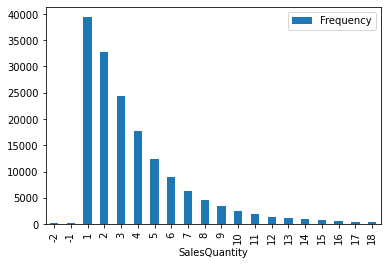

In [52]:
#@title Grafiek rond frequentie van aantal binnen SalesQuantity { vertical-output: true, display-mode: "form" }
#@markdown Hieronder is te zien dat 1 tem 5 de vaakst
#@markdown voorkomende waarden zijn en we dus
#@markdown moeten zorgen dat het model deze het best
#@markdown kan voorspellen.
sales_quantity_freq = data.groupby("SalesQuantity").count().iloc[:,:1]
sales_quantity_freq.columns = ["Frequency"]
sales_quantity_freq = sales_quantity_freq[30:50]
sales_quantity_freq.plot.bar()
fig.show()